### Muhammad Amjad & Harry Millspaugh
### Assignment 4 Exercise 3


### 1. Goal of the Trial

The goal of the trial is to evaluate patient management strategies for those who have been diagnosed with Stable Ischemic Heart Disease.

The main goal within this objective was to test the effectiveness of invasive treatment versus noninvasive treatment. Effectiveness was measured by adverse outcomes including: 

1) Death or 

2) Myocardial infraction (non-fatal))of a specific invasive cardiac treatment for this disease. 

The researchers seemed to be motivated by measuring if invasive or non-invasive treatment was able to reduce unfavorable outcomes for those with this specific heart condition.

### 2. Study Plan

The researchers split patients into two groups; the control group was assigned the "Conserative Strategy" (CON) where this group's treatment included lifestyle changes and drug therapy. The experimental group included patients who recieved operational treatment such as a heart catheter, coronary bypass surgery, and percutaneous coronary intervention -- in addition to drug therapy and lifestyle changes. Patients were randomly assigned to either the treatment group (invasive) or control group (noninvasive).

For patients to be included in this study, the following inclusion criteria had to be met:

1) At least moderate ischemia on an exercise or pharmacologic stress test.

2) End-stage renal disease on dialysis or estimated glomerular filtration rate (eGFR) <30mL/min/1.73m².

3) Willingness to comply with all aspects of the protocol, including adherence to the assigned strategy, medical therapy and follow-up visits.

4) Willingness to give written informed consent.

5) Age ≥ 21 years.

### 3. Outcome Measures

Table 1 is a contingency table because the Incidence of Death can be represented as a binary categorical variable (Did the patient die after 2.2 years? "Yes" or "No") is contingent on the type of treatment (CON or INV). Visually, we can represent this with the Incendence of Death as the rows and treatment type as the columns.

### 4. Survival Rates

The difference in survival rates between the strategies is about 1.5%. The invasive strategy survival rate was 31.7% while the conservative strategy survival rate was 33.2%. This is based on the incidence of death from any cause OR myocardial infarction.

### 5. Bootstrapping & Visualization

In [ ]:
import numpy as np
import pandas as pd

n_invasive = 388
n_invasive_deaths = 123

n_conservative = 389
n_conservative_deaths = 129


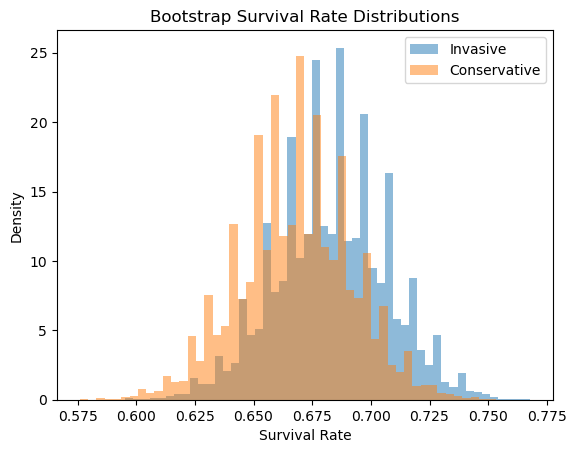

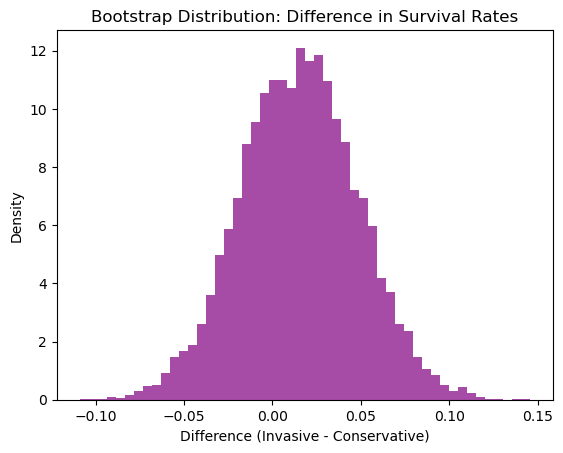

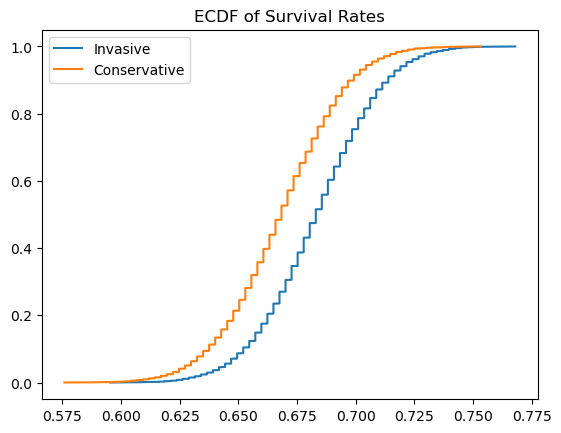

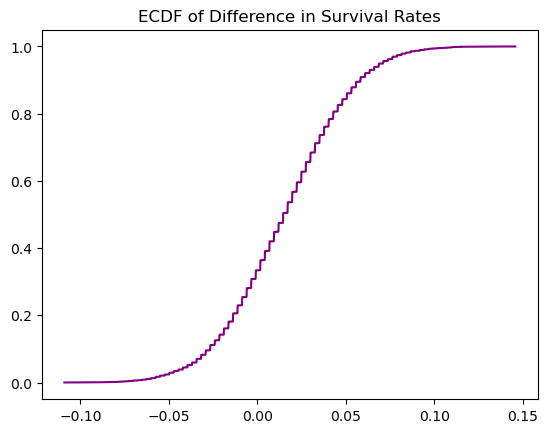

Mean difference: 0.015
95% CI: [-0.050, 0.082]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_invasive = 388
n_invasive_deaths = 123
n_conservative = 389
n_conservative_deaths = 129

invasive_data = np.array([1]*n_invasive_deaths + [0]*(n_invasive - n_invasive_deaths))
conservative_data = np.array([1]*n_conservative_deaths + [0]*(n_conservative - n_conservative_deaths))

def bootstrap_survival(data, n_boot=10000):
    rates = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        survival_rate = np.mean(sample == 0)
        rates.append(survival_rate)
    return np.array(rates)

boot_invasive = bootstrap_survival(invasive_data)
boot_conservative = bootstrap_survival(conservative_data)
boot_diff = boot_invasive - boot_conservative

plt.hist(boot_invasive, bins=50, alpha=0.5, density=True, label="Invasive")
plt.hist(boot_conservative, bins=50, alpha=0.5, density=True, label="Conservative")
plt.legend(); plt.title("Bootstrap Survival Rate Distributions")
plt.xlabel("Survival Rate"); plt.ylabel("Density")
plt.show()

plt.hist(boot_diff, bins=50, alpha=0.7, density=True, color="purple")
plt.title("Bootstrap Distribution: Difference in Survival Rates")
plt.xlabel("Difference (Invasive - Conservative)"); plt.ylabel("Density")
plt.show()

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

x1, y1 = ecdf(boot_invasive)
x2, y2 = ecdf(boot_conservative)
plt.plot(x1, y1, label="Invasive")
plt.plot(x2, y2, label="Conservative")
plt.legend(); plt.title("ECDF of Survival Rates")
plt.show()

x_diff, y_diff = ecdf(boot_diff)
plt.plot(x_diff, y_diff, color="purple")
plt.title("ECDF of Difference in Survival Rates")
plt.show()

ci_lower, ci_upper = np.percentile(boot_diff, [2.5, 97.5])
mean_diff = np.mean(boot_diff)
print(f"Mean difference: {mean_diff:.3f}")
print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")

### 7. Findings

The bootstrap analysis shows:

•	Invasive strategy patients had a marginally higher survival rate (~1.5% difference on average).

•	The uncertainty interval crosses zero, so the effect is not statistically distinguishable from no effect.

•	The plots reinforce that the two groups’ survival distributions are highly overlapping.

From a bootstrap resampling perspective, this trial doesn’t demonstrate a meaningful survival advantage of the invasive strategy over the conservative one. That matches the trial’s published finding: invasive management did not improve survival in CKD patients with ischemia.